In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results_dir = "/Users/ajay/Work/Projects/CBM/Code/bo_attack/exp_results/mnist_tf_GP_ob2__freq5_ld196_maxitr200_BILI_15images"

In [3]:
# Of these 144 attacks, find how many were successful
n_success = 0
n_total = 0
success_filenames = []
failed_cases, success_cases = [], []
result_filenames = set(os.listdir(results_dir))
for f in result_filenames:
	if f.startswith("X_mnist_adv"):
		n_success += 1
		fsplit = f.split('_')
		i, t, id = fsplit[3], fsplit[4], fsplit[6].split('.')[0]
		success_filenames.append(f"GPLCB1_BILI_d196_{i}_{t}_{id}")
	elif f.startswith("GPLCB1"):
		n_total += 1
		fsplit = f.split('_')
		i, t, id = fsplit[3], fsplit[4], fsplit[5]
		if f"X_mnist_adv_{i}_{t}_eps0.3_{id}.npy" not in result_filenames:
			failed_cases.append(f"{i}_{t}")
		else:
			success_cases.append(f"{i}_{t}")

print(f"Total attacks: {n_total}, Number successful: {n_success} ({n_success*100/n_total:.2f}%), Number failed: {n_total-n_success}")


Total attacks: 144, Number successful: 109 (75.69%), Number failed: 35


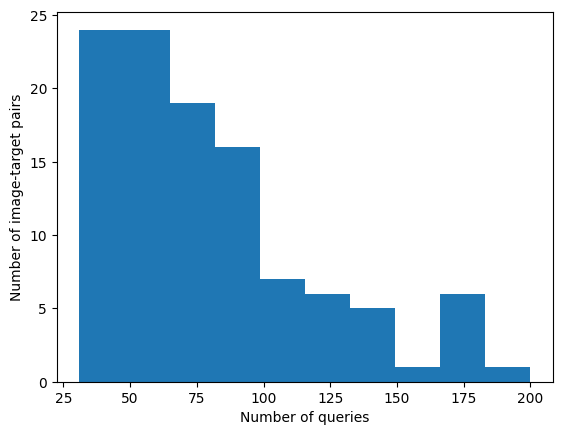

Queries: Min=31, Max=200, Mean=79.33, Median=67.00, SD=39.08


In [4]:
# For the successful attacks, plot the distribution of number of queries required and indicate max, min, median and mean.
n_queries = []
for sfn in success_filenames:
	sf = np.load(os.path.join(results_dir, sfn), allow_pickle=True)
	n_queries.append(len(sf['Y_query'][0]))

fig, ax = plt.subplots()
ax.hist(n_queries)
ax.set_xlabel('Number of queries')
ax.set_ylabel('Number of image-target pairs')
plt.show()

print(f"Queries: Min={min(n_queries)}, Max={max(n_queries)}, Mean={np.mean(n_queries):.2f}, Median={np.median(n_queries):.2f}, SD={np.std(n_queries):.2f}")

In [5]:
# Which origin-target pairs succeeded and which pairs failed?
print(len(success_cases))
print(len(failed_cases))

109
35


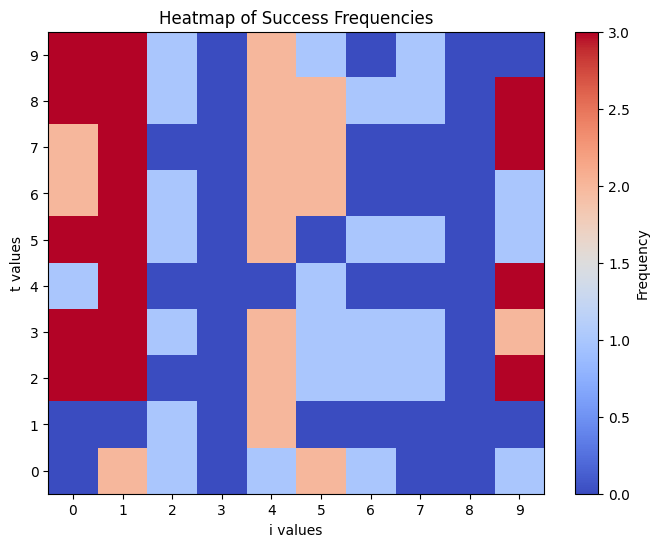

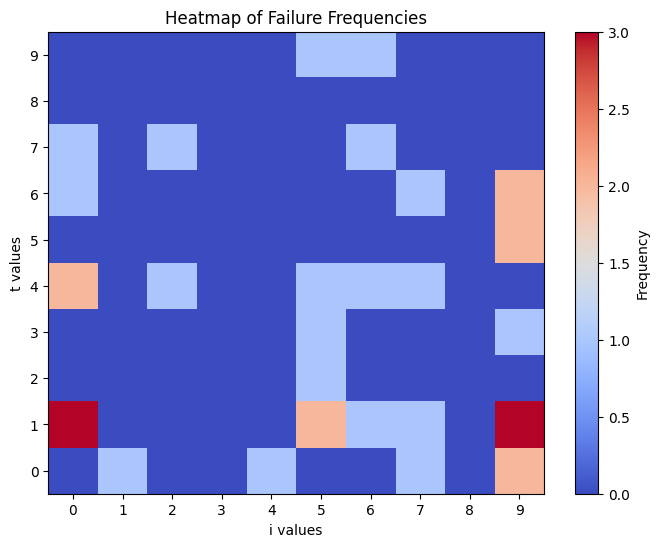

In [6]:
# Function to parse cases and plot
from collections import Counter 

def parse_and_plot(cases, title):
    # Parsing the cases to calculate frequencies
    i_values = [int(pair.split('_')[0][1]) for pair in cases]
    t_values = [int(pair.split('_')[1][1]) for pair in cases]
    pair_counts = Counter(cases)
    matrix = np.zeros((10, 10))
    for pair, count in pair_counts.items():
        i, t = map(int, pair.replace('i', '').replace('t', '').split('_'))
        matrix[i, t] = count

    # Plotting the heatmap
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.imshow(matrix.T, cmap='coolwarm', origin='lower', aspect='auto')
    ax.set_title(f'Heatmap of {title} Frequencies')
    ax.set_xlabel('i values')
    ax.set_ylabel('t values')

    # Setting ticks to align with cell centers
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_yticks(np.arange(0, 10, 1))
    ax.set_xticklabels(np.arange(0, 10, 1))
    ax.set_yticklabels(np.arange(0, 10, 1))

    # Adding a colorbar for frequency indication
    fig.colorbar(cax, ax=ax, label='Frequency')

    plt.show()

# Plotting for success cases
parse_and_plot(success_cases, "Success")

# Plotting for failed cases
parse_and_plot(failed_cases, "Failure")

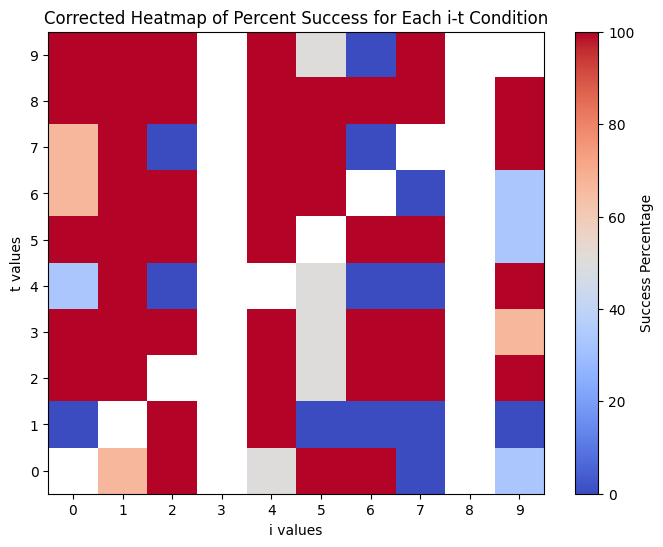

In [15]:
# Assuming 'success_cases' and 'failed_cases' lists are defined somewhere above this code

# Combine success and failure cases for total occurrences
total_cases = success_cases + failed_cases

# Calculate total occurrences
total_counts = Counter(total_cases)

# Calculate success counts separately
success_counts = Counter(success_cases)

# Initialize a matrix for success percentages
success_percentage_matrix = np.zeros((10, 10))

# Calculate success percentage for each i-t pair, adjusting for cases with no attempts
for i in range(10):
    for t in range(10):
        pair = f"i{i}_t{t}"
        total_count = total_counts.get(pair, 0)
        success_count = success_counts.get(pair, 0)
        if total_count == 0:
            # If there are no cases, we'll mark it specially later
            success_percentage_matrix[i, t] = np.nan
        else:
            success_percentage_matrix[i, t] = (success_count / total_count) * 100

# Adjusting the plotting to ensure each cell corresponds exactly to one i-t combination
fig, ax = plt.subplots(figsize=(8, 6))
# Using 'imshow' with adjusted extent to correctly align the ticks
# Note: Adding 0.5 offset to ensure ticks align with the centers of the cells
cax = ax.imshow(success_percentage_matrix.T, cmap='coolwarm', origin='lower', aspect='auto')
ax.set_title('Corrected Heatmap of Percent Success for Each i-t Condition')
ax.set_xlabel('i values')
ax.set_ylabel('t values')

# Setting the ticks to align with the cell centers
ax.set_xticks(np.arange(0, 10, 1))
ax.set_yticks(np.arange(0, 10, 1))

# Setting tick labels to represent each i and t value correctly
ax.set_xticklabels(np.arange(0, 10, 1))
ax.set_yticklabels(np.arange(0, 10, 1))

# Adding a colorbar to indicate the scale of success percentages
fig.colorbar(cax, ax=ax, label='Success Percentage')

plt.show()

